In [1]:
# Initial modules
import numpy as np
import pandas as pd
import sklearn
np.random.seed(404)
import math

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline

In [3]:
#load data

traindata= pd.read_csv('/Users/student/Documents/GitHub/AML_project/datasets/train_imperson_without4n7_balanced_data.csv')
testdata= pd.read_csv('/Users/student/Documents/GitHub/AML_project/datasets/test_imperson_without4n7_balanced_data.csv')

In [4]:
# Separate X and Y

X_train, Y_train = traindata.loc[:, traindata.columns != '155'], traindata['155']

X_test, Y_test = testdata.loc[:, testdata.columns != '155'], testdata['155']


In [5]:
%%time

# Pipeline 1 - Accuracy

pipeline1 = Pipeline([
    ('zero variance', VarianceThreshold()),
    ('top20 features', SelectKBest(f_classif, k=20)),
    ('ada',AdaBoostClassifier(n_estimators=150,learning_rate=0.1))])

pipeline1.fit(X_train,Y_train)

CPU times: user 15.5 s, sys: 736 ms, total: 16.2 s
Wall time: 8.45 s


Pipeline(memory=None,
         steps=[('zero variance', VarianceThreshold(threshold=0.0)),
                ('top20 features',
                 SelectKBest(k=20,
                             score_func=<function f_classif at 0xa1c1df0e0>)),
                ('ada',
                 AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
                                    learning_rate=0.1, n_estimators=150,
                                    random_state=None))],
         verbose=False)

In [6]:
Y_predict1=pipeline1.predict(X_test)
accuracy_score(Y_test, Y_predict1)*100

99.07614921061806

In [7]:
#Pipleline 1 - Classification Report

report = classification_report(Y_test, Y_predict1)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20079
           1       0.98      1.00      0.99     20079

    accuracy                           0.99     40158
   macro avg       0.99      0.99      0.99     40158
weighted avg       0.99      0.99      0.99     40158



In [8]:
#Pipeline 1 - Confusion Matrix

matrix = confusion_matrix(Y_test, Y_predict1)
print(matrix)

p1_TP = matrix[0][0]
p1_TN = matrix[1][1]
p1_FP = matrix[1][0]
p1_FN = matrix[0][1]

print('')

print('True Positive = %.0f' % p1_TP)
print('True Negative = %.0f' % p1_TN)

print('')

print('False Positive = %.0f' % p1_FP)
print('False Negative = %.0f' % p1_FN)

[[19708   371]
 [    0 20079]]

True Positive = 19708
True Negative = 20079

False Positive = 0
False Negative = 371


In [9]:
#Pipeline 1 - Evaluation Metrics

p1_Acc = (p1_TP + p1_TN) / (p1_TP + p1_TN + p1_FP + p1_FN)
print('Acc = %.4f' % p1_Acc)

p1_DR = p1_TP / (p1_TP + p1_FN)
print('DR(Recall) = %.4f' % p1_DR)

p1_Prec = p1_TP / (p1_TP + p1_FP)
print('Precision = %.4f' % p1_Prec)

p1_FAR = p1_FP / (p1_TN + p1_FP)
print('FAR = %.4f' % p1_FAR)


p1_FNR = p1_FN / (p1_FN + p1_TP)
print('FNR = %.4f' % p1_FNR)

p1_F1 = (2 * p1_TP) / (2*p1_TP + p1_FP + p1_FN)
print('F1 = %.4f' % p1_F1)

p1_MCC = ((p1_TP * p1_TN) - (p1_FP * p1_FN)) / math.sqrt((p1_TP + p1_FP)*(p1_TP + p1_FN)*(p1_TN + p1_FP)*(p1_TN + p1_FN))
print('MCC = %.4f' % p1_MCC)

Acc = 0.9908
DR(Recall) = 0.9815
Precision = 1.0000
FAR = 0.0000
FNR = 0.0185
F1 = 0.9907
MCC = 0.9817


AUC: 0.990


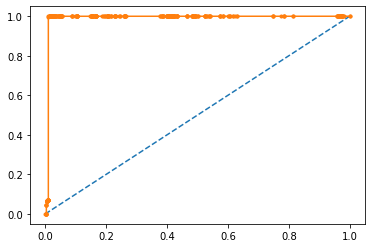

In [10]:
#Pipeline 1 - ROC Curve

probs = pipeline1.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(Y_test, probs)

pyplot.plot([0,1],[0,1], linestyle = '--')

pyplot.plot(fpr,tpr,marker='.')

pyplot.show()